<a href="https://colab.research.google.com/github/thepianist9/FER-Classification-DL-/blob/master/Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import  Conv2D ,MaxPool2D
from keras.layers import Activation,Dropout,Flatten, Dense
from keras import backend as k
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt

In [3]:
!wget https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv

--2021-03-23 15:20:57--  https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n8bninud94blch4/fer2013.csv [following]
--2021-03-23 15:20:57--  https://www.dropbox.com/s/raw/n8bninud94blch4/fer2013.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02146eb2d7a97cd4b90776c123.dl.dropboxusercontent.com/cd/0/inline/BLNutCEP15XjBuRWcnHdulfeTg6Mab48WmLnREbouRWxYuTlxYk1UPXs6t1OqqqNJA16m6sPWvq4IGDWuymoT7wJ4oqvWtsua-x5_jiuEkT_8zDOISKiKpuOlgNRsEGhIJvret-eEEKSxYuneHGqQDzC/file# [following]
--2021-03-23 15:20:58--  https://uc02146eb2d7a97cd4b90776c123.dl.dropboxusercontent.com/cd/0/inline/BLNutCEP15XjBuRWcnHdulfeTg6Mab48WmLnREbouRWxYuTlxYk1UPXs6t1OqqqNJA16m6sPWvq4IGDWuymoT7wJ4oqvW

#Reading Data and Listing Emotions

In [4]:
df = pd.read_csv("fer2013.csv") 
emotions_enc = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


#Displaying images from Dataset


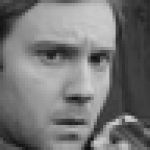

Angry


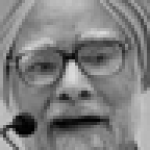

Angry


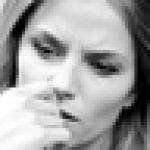

Fear


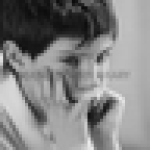

Sad


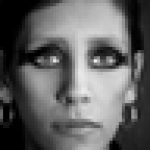

Neutral


In [60]:
for i in range(5):
    img = np.fromstring(df.iloc[i]['pixels'], dtype=int, sep=' ').reshape((48,48)).astype('uint8')
    img = cv.resize(img, (150, 150), interpolation = cv.INTER_AREA)
    cv2_imshow(img)
    print(emotions_enc[df.iloc[i]['emotion']])

In [6]:
#train test split
df_train = df.loc[(df.Usage == "Training")]
df_test = df.loc[(df.Usage == "Test")]
width, height = (48, 48)

#preprocesing
pixels = df['pixels'].tolist() # 1
faces = []
for face in pixels:
    face = np.fromstring(face, dtype=int, sep=' ').reshape((48,48))
    faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1) # 6

emotions = pd.get_dummies(df['emotion']).to_numpy() # 7

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

In [8]:
X_train.shape

(29068, 48, 48, 1)

#Designing the model

In [9]:
from keras.regularizers import l2
from keras.layers import BatchNormalization, MaxPooling2D

model = tf.keras.Sequential()
num_features = 64

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

#Model Architecture


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

#Train

In [11]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [12]:
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

tensorboard = TensorBoard(log_dir='./logs')
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

In [43]:
model.fit(np.array(X_train), np.array(y_train),
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          shuffle=True,
          callbacks=[lr_reducer, tensorboard, early_stopper])

Epoch 1/100
455/455 [==============================] - 21s 46ms/step - loss: 0.6277 - accuracy: 0.7812 - val_loss: 1.0690 - val_accuracy: 0.6489
Epoch 2/100
455/455 [==============================] - 20s 45ms/step - loss: 0.6051 - accuracy: 0.7863 - val_loss: 1.0999 - val_accuracy: 0.6509
Epoch 3/100
455/455 [==============================] - 20s 45ms/step - loss: 0.5898 - accuracy: 0.7907 - val_loss: 1.1031 - val_accuracy: 0.6581
Epoch 4/100
455/455 [==============================] - 20s 44ms/step - loss: 0.5815 - accuracy: 0.7957 - val_loss: 1.1048 - val_accuracy: 0.6595

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005904900433961303.
Epoch 5/100
455/455 [==============================] - 20s 44ms/step - loss: 0.5595 - accuracy: 0.8020 - val_loss: 1.1048 - val_accuracy: 0.6492
Epoch 6/100
455/455 [==============================] - 20s 44ms/step - loss: 0.5412 - accuracy: 0.8110 - val_loss: 1.3709 - val_accuracy: 0.6186
Epoch 7/100
455/455 [============================

In [ ]:
test2 = cv.imread("/../test_image.jpeg", 0)
cv2_imshow(test2)

img = cv.resize(test2, (48, 48), interpolation = cv.INTER_AREA).astype('float32')
img1 = cv.resize(test2, (48, 48), interpolation = cv.INTER_AREA).astype('float32')
cv2_imshow(img1)

img2 = np.expand_dims(img1, -1)
img2 = np.expand_dims(img2, 0)
img2.shape

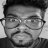

Angry


In [34]:
cv2_imshow(img1)
pred = model.predict(img2)
print(emotions_enc[np.argmax(pred)])

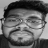

Neutral


In [38]:
cv2_imshow(img1)
pred = model.predict(img2)
print(emotions_enc[np.argmax(pred)])

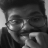

Happy


In [55]:
cv2_imshow(img1)
pred = model.predict(img2)
print(emotions_enc[np.argmax(pred)])